In [64]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from plot_tsp import Plot_TSP # To nicely plot the TSP

Recall that the travelling salesman problem (TSP) has been previously solved with a genetic and random search. A solution consists of finding the sequence of cities visited (always starting and ending in the same city) which minimizes the distance travelled.

**Simulation parameters:**
- 32 cities
- 10000 steps per block (annealing), 10000 individuals per block (genetic) 
- 100 blocks

# The Traveling Salesman Problem with Simulated Annealing

Simulated annealing is a metropolis algorithm which moves with a fictitious temperature that cools over time.
My annealing algorithm cools from a starting temperature to zero using a schedule.

In [65]:
n_blocks = 10
starting_temp = 50
rate = starting_temp / n_blocks
print("Annealing schedule, e.g. : ")
starting_temp - rate * (np.arange(n_blocks) + 1)

Annealing schedule, e.g. : 


array([45., 40., 35., 30., 25., 20., 15., 10.,  5.,  0.])

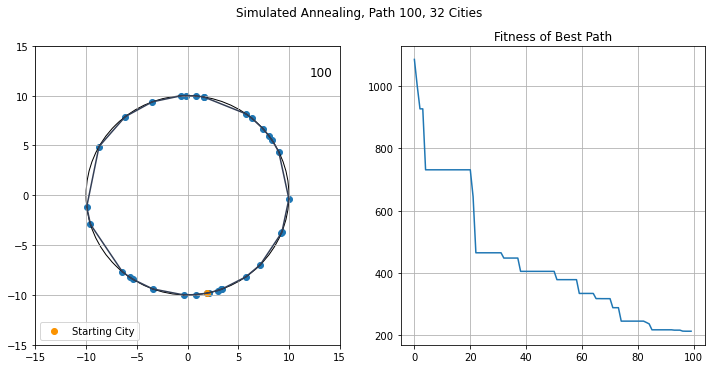

In [68]:
# load data
x, y = np.loadtxt("./annealing/data/circle/cities.dat", usecols=(0, 1), unpack=True)
best_paths = np.loadtxt("./annealing/data/circle/best_paths.dat", dtype=int)
fitness = np.loadtxt("./annealing/data/circle/fitness.dat")
n = len(best_paths) - 1
radius = 10
n_cities = len(x) - 1

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5.5))
plt.suptitle("Simulated Annealing, Path " + str(n + 1) + ", " + str(n_cities) + " Cities")

Plot_TSP(best_paths[n], x, y, radius, "circle", ax[0], label_cities=False)
ax[0].text(radius * 1.2, radius * 1.2, str(n + 1), fontsize="large")

ax[1].plot(np.arange(n + 1), fitness)
ax[1].grid()
ax[1].title.set_text("Fitness of Best Path")
plt.show()

**Figure: Simulated Annealing solves TSP on circle.**

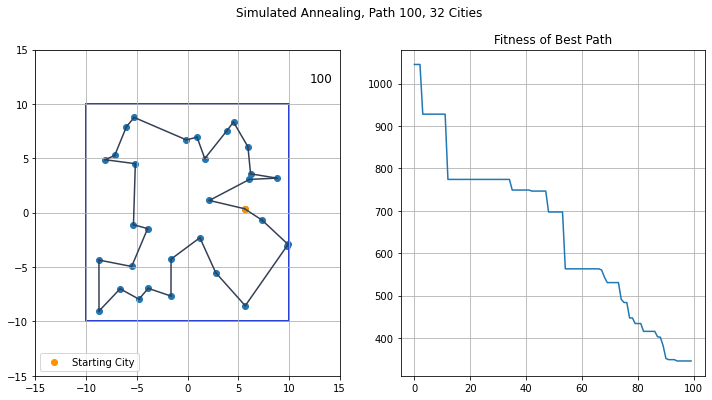

In [58]:
# load data
x, y = np.loadtxt("./annealing/data/square/cities.dat", usecols=(0, 1), unpack=True)
best_paths = np.loadtxt("./annealing/data/square/best_paths.dat", dtype=int)
fitness = np.loadtxt("./annealing/data/square/fitness.dat")

n = len(best_paths) - 1
side = 10
n_cities = len(x) - 1

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle("Simulated Annealing, Path " + str(n + 1) + ", " + str(n_cities) + " Cities")

Plot_TSP(best_paths[n], x, y, side, "square", ax[0], label_cities=False)
ax[0].text(radius * 1.2, radius * 1.2, str(n + 1), fontsize="large")

ax[1].plot(np.arange(n + 1), fitness)
ax[1].grid()
ax[1].title.set_text("Fitness of Best Path")
plt.show()

**Figure: Simulated Annealing solves TSP in square.**

# The Traveling Salesman Problem with Parallel Search 

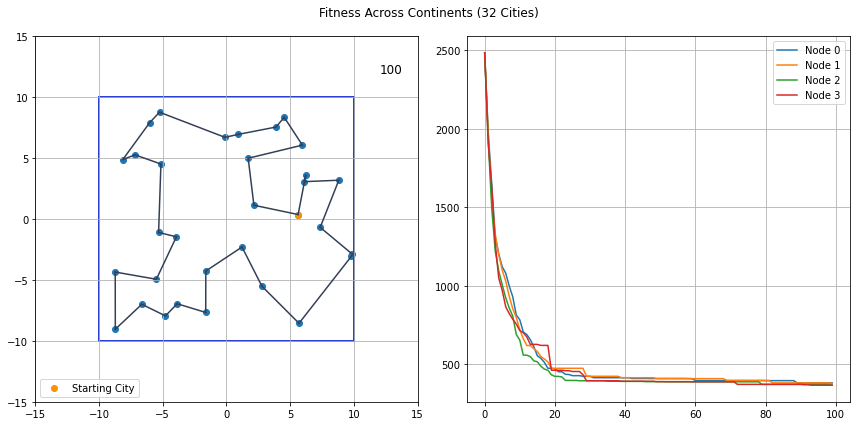

In [62]:
# load data
# x, y = np.loadtxt("./annealing/data/square/cities.dat", usecols=(0, 1), unpack=True)
fitness_0 = np.loadtxt("./data/parallel/least_cost_0.dat")
fitness_1 = np.loadtxt("./data/parallel/least_cost_1.dat")
fitness_2 = np.loadtxt("./data/parallel/least_cost_2.dat")
fitness_3 = np.loadtxt("./data/parallel/least_cost_3.dat")

best_paths = np.loadtxt("./data/parallel/glob_best_path.dat", dtype=int)

n = len(best_paths) - 1
side = 10
n_cities = len(x) - 1

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle("Simulated Annealing, Path " + str(n + 1) + ", " + str(n_cities) + " Cities")

Plot_TSP(best_paths[n], x, y, side, "square", ax[0], label_cities=False)
ax[0].text(radius * 1.2, radius * 1.2, str(n + 1), fontsize="large")

plt.suptitle("Fitness Across Continents (32 Cities)")
sns.lineplot(x=np.arange(n + 1), ax=ax[1], y=fitness_0, label='Node 0')
sns.lineplot(x=np.arange(n + 1), ax=ax[1], y=fitness_1, label='Node 1')
sns.lineplot(x=np.arange(n + 1), ax=ax[1], y=fitness_2, label='Node 2')
sns.lineplot(x=np.arange(n + 1), ax=ax[1], y=fitness_3, label='Node 3')

plt.grid(True)
plt.tight_layout()
plt.show()

**Figure: Parallel Genetic Search solves TSP in square. Fitness across parallel nodes.**

# Genetic vs Simulated Annealing vs Parallel

Genetic Algorithm least cost: 377.64195
Simulated Annealing Algorithm least cost: 346.075
Parallel Genetic Algorithm least cost: 366.01


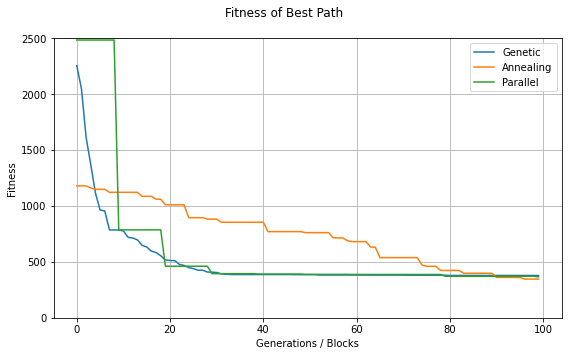

In [69]:
fitness_genetic = np.loadtxt("./data/genetic/least_cost.dat")
fitness_anneal = np.loadtxt("./data/annealing/fitness.dat")
fitness_parallel = np.loadtxt("./data/parallel/glob_least_cost.dat")

fig, ax = plt.subplots(figsize=(8, 5))

plt.suptitle("Fitness of Best Path")
sns.lineplot(x=np.arange(n + 1), y=fitness_genetic, label='Genetic')
sns.lineplot(x=np.arange(n + 1), y=fitness_anneal, label='Annealing')
sns.lineplot(x=np.arange(n + 1), y=fitness_parallel, label='Parallel')

plt.grid()
plt.ylim(0, 2500)
plt.ylabel("Fitness")
plt.xlabel("Generations / Blocks")
plt.tight_layout()

print("Genetic Algorithm least cost:", fitness_genetic[n])
print("Simulated Annealing Algorithm least cost:", fitness_anneal[n])
print("Parallel Genetic Algorithm least cost:", fitness_parallel[n])

plt.show()

**Figure: Algorithm progress compared.** It seems all algorithms did a decent job at solving the problem, perhaps I could test them with a more complex problem or simply less computing time. Simulated annealing found the most efficient path, but this could be due to chance (finding the global minimum is challenging).

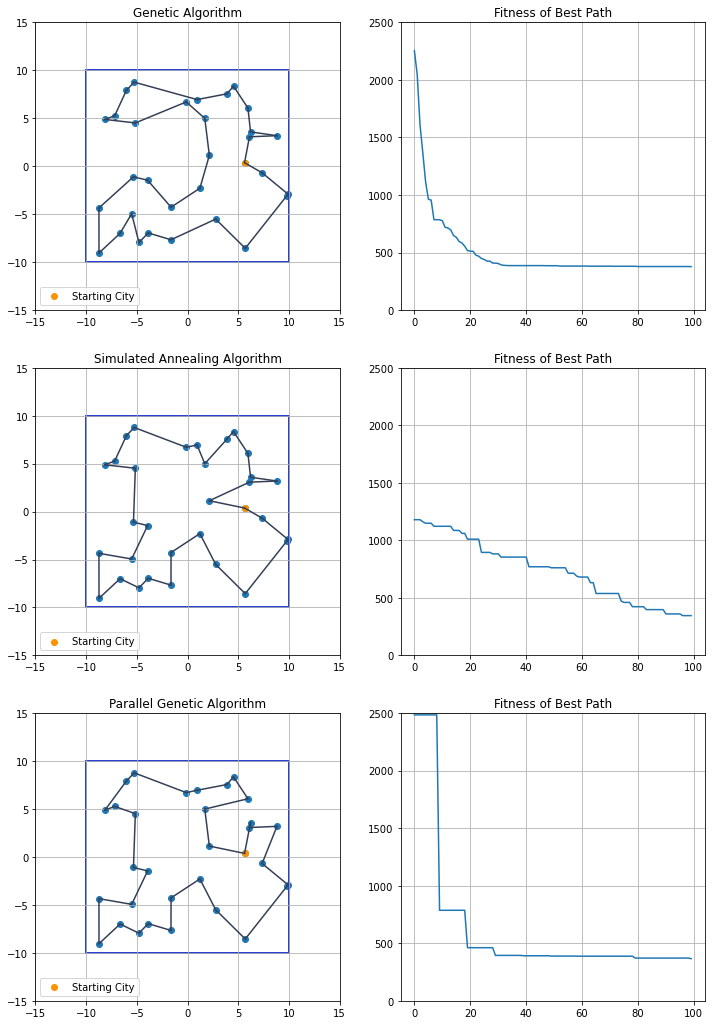

In [70]:
x, y = np.loadtxt("./data/cities.dat", usecols=(0, 1), unpack=True)
best_genetic = np.loadtxt("./data/genetic/best_path.dat", dtype=int)
best_anneal = np.loadtxt("./data/annealing/best_paths.dat", dtype=int)
best_parallel = np.loadtxt("./data/parallel/glob_best_path.dat", dtype=int)

fitness_genetic = np.loadtxt("./data/genetic/least_cost.dat")
fitness_anneal = np.loadtxt("./data/annealing/fitness.dat")
fitness_parallel = np.loadtxt("./data/parallel/glob_least_cost.dat")

n = len(best_genetic) -1
side = 10
n_cities = len(x) - 1

# plot
fig, ax = plt.subplots(3, 2, figsize=(12, 18))

Plot_TSP(best_genetic[n], x, y, side, "square", ax[0, 0], label_cities=False)
ax[0, 1].plot(np.arange(n + 1), fitness_genetic)
ax[0, 1].grid(True)
ax[0, 0].title.set_text("Genetic Algorithm")
ax[0, 1].title.set_text("Fitness of Best Path")
ax[0, 1].set_ylim(0,2500)


Plot_TSP(best_anneal[n], x, y, side, "square", ax[1, 0], label_cities=False)
ax[1, 1].plot(np.arange(n + 1), fitness_anneal)
ax[1, 1].grid(True)
ax[1, 0].title.set_text("Simulated Annealing Algorithm")
ax[1, 1].title.set_text("Fitness of Best Path")
ax[1, 1].set_ylim(0,2500)


Plot_TSP(best_parallel[n], x, y, side, "square", ax[2, 0], label_cities=False)
ax[2, 1].plot(np.arange(n + 1), fitness_parallel)
ax[2, 1].grid(True)
ax[2, 1].set_ylim(0,2500)
ax[2, 0].title.set_text("Parallel Genetic Algorithm")
ax[2, 1].title.set_text("Fitness of Best Path")

**Figure: All algorithms compared.**

## Parallelization Reference

0. **Parallel RNG**

```c++
  Primes >> p1 >> p2;
  input >> seed[0] >> seed[1] >> seed[2] >> seed[3];
  for (int i = 0; i < 4; ++i) seed[i] *= mpi_rank; // unique seed for each node
  rnd.SetRandom(seed, p1, p2);
  arma_rng::set_seed(0); // seed armadillo
```

1. **Initialization and Finalization**

```c++
MPI_Init(&argc, &argv);
MPI_Comm_size(MPI_COMM_WORLD, &mpi_size);
MPI_Comm_rank(MPI_COMM_WORLD, &mpi_rank);
...
MPI_Finalize();

```

2. **Gathering global data**

```c++

  // 1. keep track of the global least cost
  double send_cost = least_cost;             // send buffer
  double* recv_cost = new double[mpi_size];  // recv buffer

  MPI_Gather(&send_cost, 1, MPI_DOUBLE, recv_cost, 1, MPI_DOUBLE, 0, MPI_COMM_WORLD);

  int best_node = 0;
  if (mpi_rank == 0 ){
    for (int i = 0; i < mpi_size; ++i) {
      cout << recv_cost[i] << " ";
      if (recv_cost[i] < glob_least_cost) {
        glob_least_cost = recv_cost[i];
        best_node = i; // keep track of where the best path is
      }
    }
    cout << endl;
  }

  // cue the best node to send its best path with an array (0, ... , 1, ... , 0)
  int msg_size = n_cities - 1;
  int* cue_send = new int[mpi_size];
  int cue_recv = 0;

  if (mpi_rank == 0) {
    for (int i = 0; i < mpi_size; ++i) {
      if (i == best_node) cue_send[i] = 1; // fittest node gets "1"
      else cue_send[i] = 0; // others get "0"
    }
  }

  // scatter the cues
  MPI_Scatter(&cue_send[0], 1, MPI_INT, &cue_recv, 1, MPI_INT, 0, MPI_COMM_WORLD);

  // better behavior with std::vec
  vector<int> send_path = conv_to<vector<int> >::from(best_path);
  vector<int> get_path = conv_to<vector<int> >::from(glob_best_path);

  if (cue_recv == 1) {
    MPI_Send(&send_path[0], msg_size, MPI_INT, 0, 6, MPI_COMM_WORLD);
  }
  if (mpi_rank == 0 && best_node != 0){
    MPI_Recv(&get_path[0], msg_size, MPI_INT, best_node, 6, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
    glob_best_path = conv_to<urowvec>::from(get_path);
  }

  MPI_Barrier(MPI_COMM_WORLD); // pause until all nodes reach this point
```

3. **Migration**

```c++
  // Each of the four nodes needs to exchange part of its population.
  int msg_size = n_cities - 1; // buffer size
  vector<int> get_path(msg_size); // recv buffer
  vector<int> send_path; // send buffer
  urowvec good_path;

  int n_send = 4; // number of paths to exchange

  for (int i = 0; i < n_send; ++i) {

    good_path = population.at(selection(i)); // path to send
    send_path = conv_to<vector<int> >::from(good_path);

    if (mpi_rank == 0){
      MPI_Send(&send_path[0], msg_size, MPI_INT, 1, 1, MPI_COMM_WORLD);
      MPI_Recv(&get_path[0], msg_size, MPI_INT, 1, 2, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
    }
    else if (mpi_rank == 1){

      MPI_Recv(&get_path[0], msg_size, MPI_INT, 0, 1, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
      MPI_Send(&send_path[0], msg_size, MPI_INT, 0, 2, MPI_COMM_WORLD);

    } else if (mpi_rank == 2){

      MPI_Send(&send_path[0], msg_size, MPI_INT, 3, 3, MPI_COMM_WORLD);
      MPI_Recv(&get_path[0], msg_size, MPI_INT, 3, 4, MPI_COMM_WORLD, MPI_STATUS_IGNORE);

    }
    else if (mpi_rank == 3){

      MPI_Recv(&get_path[0], msg_size, MPI_INT, 2, 3, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
      MPI_Send(&send_path[0], msg_size, MPI_INT, 2, 4, MPI_COMM_WORLD);

    }

    population.at(selection(n_replicas-1-i)) = conv_to<urowvec>::from(get_path); // copy to worst slots of population
  }
```